# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 7th 2022

<hr style="border:1px solid black"> </hr>


In [ ]:
Name: Laurence Côté

In [1]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Data Analysis II: k-means for clustering datapoints

In [5]:
### Import and clean the penguins dataset
data_penguin = pd.read_csv("palmer_penguins.csv", sep=",", header=0)
data_penguin.dropna(axis="index", inplace=True)
data_penguin = data_penguin.reset_index(drop=True)

In [6]:
### Do dimensionality reduction through PCA
X = data_penguin.iloc[:, 2:6]

# Data scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

# Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_scaled)

# Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)

reduce_penguin = pd.DataFrame(X_reduce)
reduce_penguin["species"] = data_penguin.species
reduce_penguin["island"] = data_penguin.island
reduce_penguin["sex"] = data_penguin.sex

In [132]:
reduce_penguin

,0,1,2,3,species,island,sex
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,Torgersen,MALE
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,Torgersen,FEMALE
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,Torgersen,FEMALE
3,-1.885288,-0.012351,-0.628873,-0.472893,Adelie,Torgersen,FEMALE
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,Torgersen,MALE
...,...,...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo,Biscoe,FEMALE
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo,Biscoe,FEMALE
330,2.751505,0.266556,-0.419306,0.236256,Gentoo,Biscoe,MALE
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo,Biscoe,FEMALE


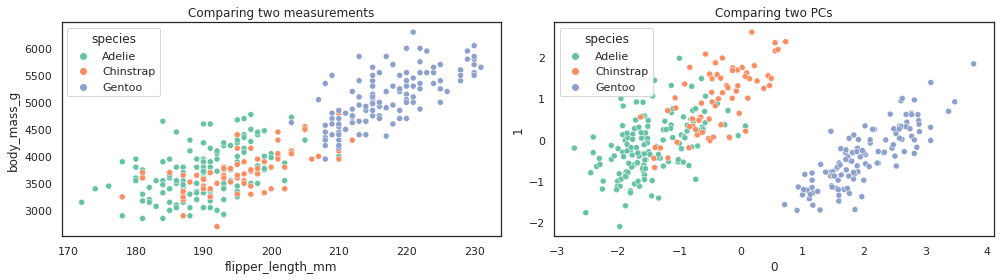

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_penguin, x=0, y=1, hue="species", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

We wish to group similar samples and compare the groups to catagorical labels.

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster pengouins based on the species?

In [8]:
### Define the data
P = data_penguin.loc[:, ["flipper_length_mm", "body_mass_g"]]
P.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [10]:
### Initiate the k-means alogirthm
### How many cluster should we use?
K = 3
kmean = sklearn.cluster.KMeans(n_clusters=K)

In [11]:
### Apply kmeans to our data
kmeans_P = kmean.fit(P)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [12]:
### Get centroids coordinate
kmeans_P.cluster_centers_

array([[ 204.65686275, 4445.34313725],
       [ 190.08695652, 3522.04968944],
       [ 220.61428571, 5435.35714286]])

In [13]:
### Get datapoints labels
kmeans_P.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,

In [16]:
### Add the cluster column
data_penguin.loc[:,"cluster"] = kmeans_P.labels_

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

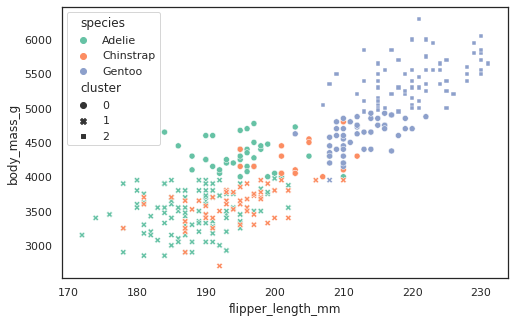

In [27]:
### Plot the cluster and the labels
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", style="cluster")

<AxesSubplot:xlabel='0', ylabel='1'>

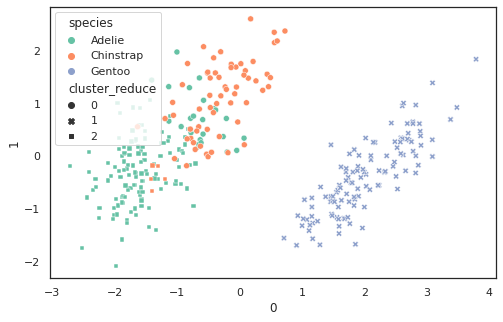

In [136]:
### Instead of using measurements values, cluster penguins based on the result of the dimensionality reduction
R = reduce_penguin.iloc[:, 0:4]
K = 3
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmeans_R = kmean.fit(R)
reduce_penguin.loc[:,"cluster_reduce"] = kmeans_R.labels_
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(data=reduce_penguin, x=0, y=1, hue="species", style="cluster_reduce")

It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [28]:
### Get the inertia of our initial kmean
kmeans_P.inertia_

28328503.022628184

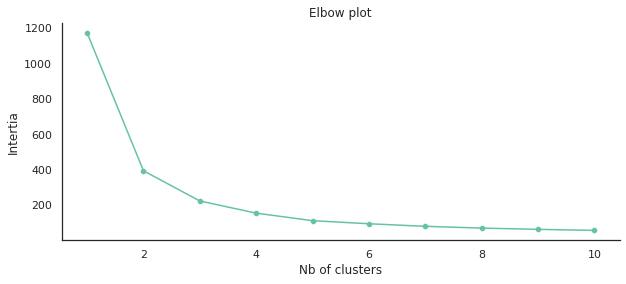

In [29]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_penguin.iloc[:, 0:2]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()

## Data Analysis III: Putting it all together!

You are given a dataset of gene experissions for $N$ samples. Each sample represent a breast cancer patient. 
The dataset comprises two TSV files:
* `patient_expression.tsv`: contains the expressions of $M$ genes for each of the `N` patients;
* `patient_subtype.tsx`: contains the clinical classification of each patient;

The order is the same for all files.

You wonder if you can cluster patient, from their expression profil, by clinical classification.
** The expression values are already log-transformed

### Create a dataframe of the data

In [69]:
expression = pd.read_table("breast_cancer_expression.tsv", header=0)
subtype = pd.read_table("breast_cancer_subtype.tsv", header=None)

In [79]:
BC = pd.concat([subtype, expression], axis=1)
BC.rename({0 : "subtype"}, axis=1, inplace=True)

BC.head()

,subtype,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,Basal,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,Basal,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,Basal,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,Basal,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,Basal,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


### Explore the data [35 points]

<hr>

#### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [72]:
len(BC)

645

In [73]:
#645 patients are being considered

In [76]:
BC.shape[1]

48

In [77]:
#We are considering 47 genes (1 column is "patient").

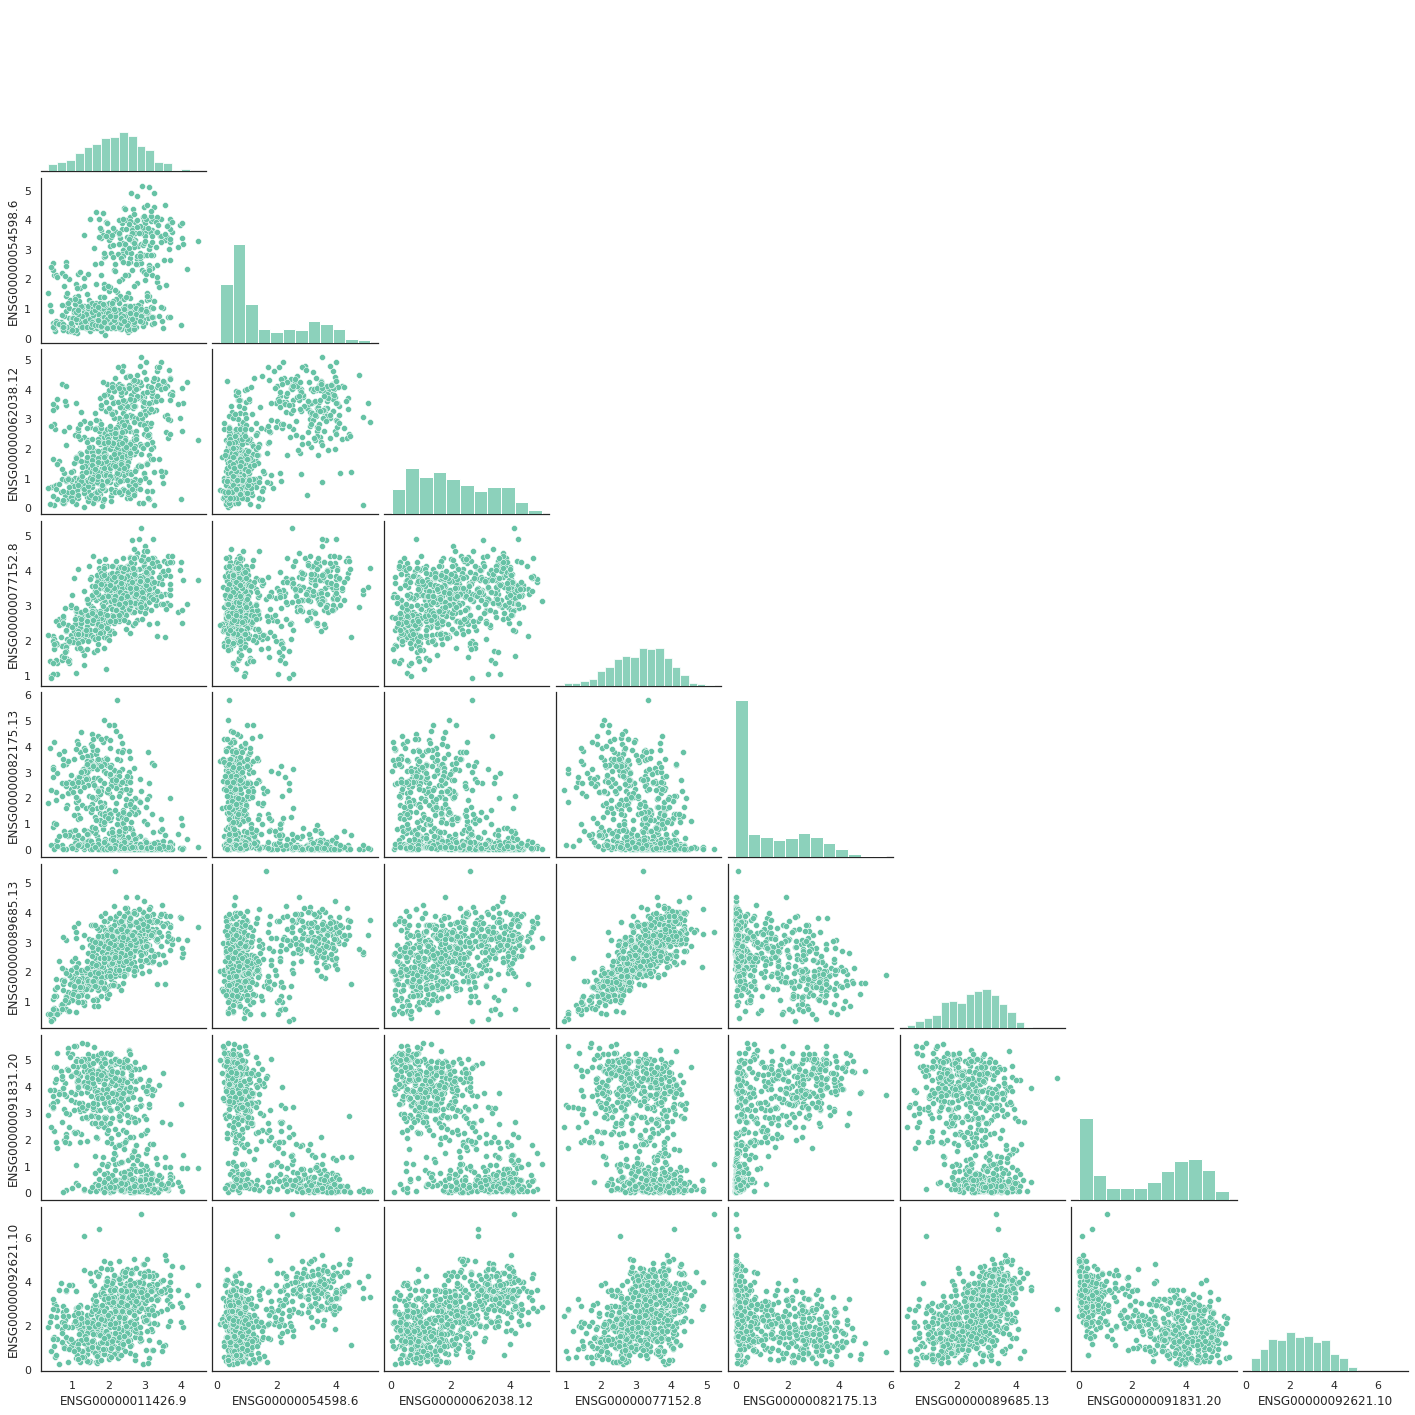

In [83]:
sns.pairplot(data=BC.iloc[:,1:9], corner=True)

In [84]:
# ENSG00000077152.8 and ENSG00000089685.13 seem to be correlated.

In [86]:
import scipy as sp
regBC = sp.stats.linregress(x=BC.loc[:,"ENSG00000077152.8"], y=BC.loc[:,"ENSG00000089685.13"])
regBC.rvalue

0.7667386364941874

In [87]:
#The correlation coefficient between ENSG00000077152.8 and ENSG00000089685.13 is 0.7667.

<hr>

#### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plot comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

In [139]:
#For the pair of genes I chose to assess linear correlation, I want to see if their expression is also associated to specific cancer subtypes.

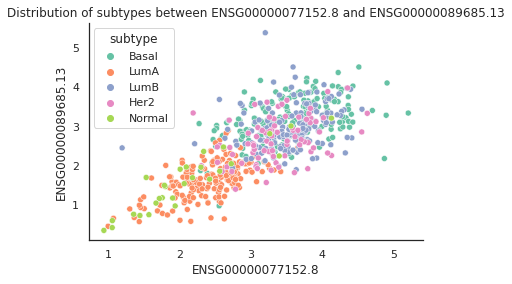

In [92]:
sns.scatterplot(data=BC, x="ENSG00000077152.8", y="ENSG00000089685.13", hue="subtype")
plt.title("Distribution of subtypes between ENSG00000077152.8 and ENSG00000089685.13")
sns.despine()

In [140]:
#ENSG00000077152.8 and ENSG00000089685.13 are linearly correlated as shown previously. They also seem to be more expressed in basal, luminal B and Her2 subtypes, but not luminal A. Therefore, one could hypothesize that the luminal A subtype ressembles more genetically normal patients.

In [141]:
#Using another pair of genes that are not linearly correlated, I want to see if the expression distribution can be clustered based on subtypes.

<AxesSubplot:xlabel='ENSG00000091831.20', ylabel='ENSG00000054598.6'>

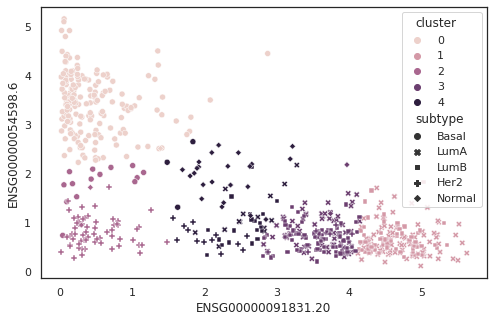

In [102]:
B = BC.loc[:, ["ENSG00000091831.20", "ENSG00000054598.6"]]
k = 5
kMean = sklearn.cluster.KMeans(n_clusters=k)
kmeans_B = kMean.fit(B)
BC.loc[:,"cluster"] = kmeans_B.labels_
figure = plt.figure(figsize=(8, 5))
sns.scatterplot(data=BC, x="ENSG00000091831.20", y="ENSG00000054598.6", hue="cluster", style="subtype")

In [103]:
#The cluster 0 appear to gather the basal subtype points (the ENSG00000091831.20 gene is not expressed and the ENSG00000054598.6 gene is only expressed for this subtype). 
#Clusters 1 and 3 gather most of the luminal A and luminal B points (the ENSG00000054598.6 gene is not expressed and the ENSG00000091831.20 gene is expressed the most foe these subtypes).
#The cluster 2 seems to represent the Her2 points (Both genes are not expressed for this subtype).
#Cluster 4 is not specific no any subtype, it contains the normal points, some of the Her2 points, the LumA points and the LumB points.
#The clusters appear to follow the cancer subtypes but very loosely.

<hr style="border:1px solid black"> </hr>

### Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

#### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

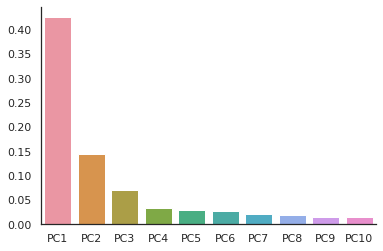

In [138]:
X = BC.iloc[:, 1:]

pca = sklearn.decomposition.PCA(n_components=10)
pca.fit(X)

scale = sklearn.preprocessing.StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X) 
pca_BC = sklearn.decomposition.PCA(n_components=10)
pca_BC.fit(X_scaled)

sns.barplot(x=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"], y=pca_BC.explained_variance_ratio_)
sns.despine()

#3 components are enough

<AxesSubplot:xlabel='0', ylabel='1'>

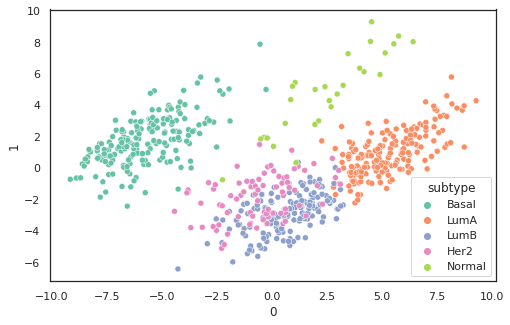

In [111]:
X_reduce = pca_BC.fit_transform(X_scaled)
reduce_BC = pd.DataFrame(X_reduce)
reduce_BC["subtype"] = BC["subtype"]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=reduce_BC, x=0, y=1, hue="subtype")

In [142]:
#After reduction, 2 PCs are enough to group patients into clusters.

Are you able to link each found cluster to a cancer subtype?

In [122]:
Y = reduce_BC.iloc[:,0:10]
k = 5
kMean = sklearn.cluster.KMeans(n_clusters=k)
kmeans_Y = kMean.fit(Y)
reduce_BC.loc[:,"cluster"] = kmeans_Y.labels_


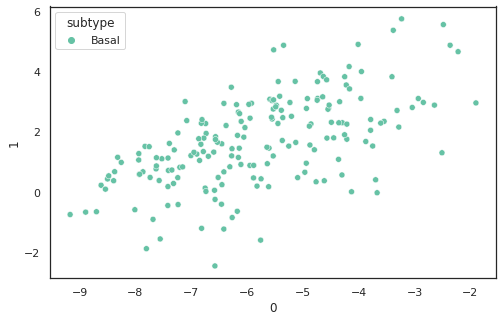

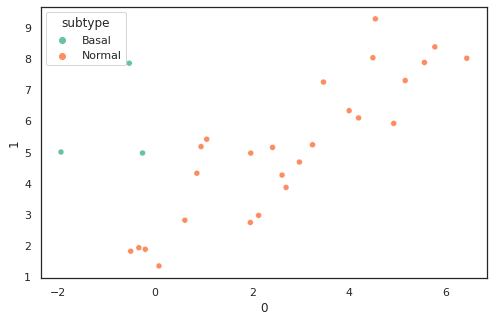

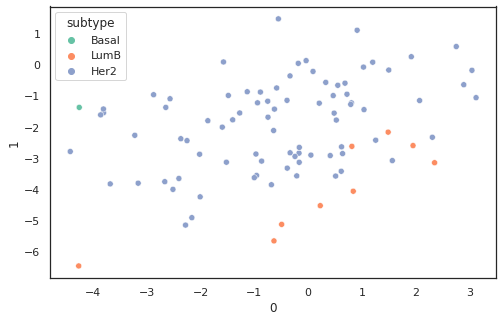

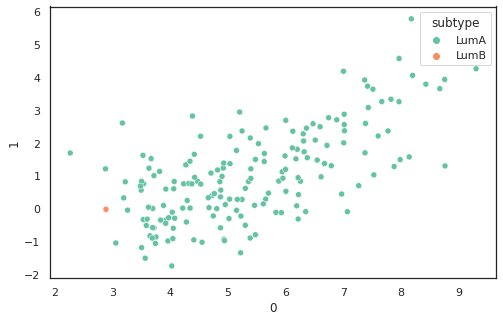

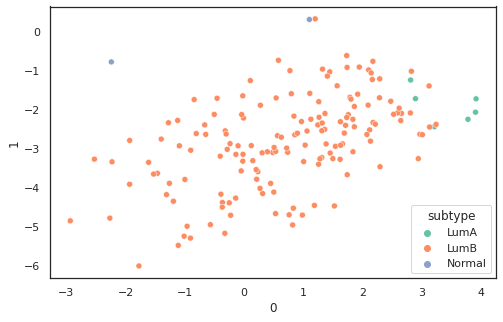

In [123]:
list_cluster = reduce_BC.cluster.unique()

for s in list_cluster:
    tmp = reduce_BC.loc[reduce_BC.cluster == s, :]
    
    figure = plt.figure(figsize=(8, 5))
    sns.scatterplot(data=tmp, x=0, y=1, hue="subtype")
    

In [143]:
##Each cluster from the previous plot can be linked to a specific subtype. 
#The first plot is basal (in green previously).
#The second one is normal (in light green previously).
#The third one is Her2 (in pink previously).
#The fourth plot is LumA (in orange previously).
#The fifth plot is LumB (in purple previously).

<hr>

#### Part 2

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

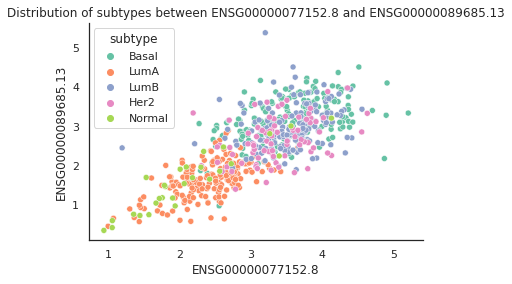

In [137]:
sns.scatterplot(data=BC, x="ENSG00000077152.8", y="ENSG00000089685.13", hue="subtype")
plt.title("Distribution of subtypes between ENSG00000077152.8 and ENSG00000089685.13")
sns.despine()

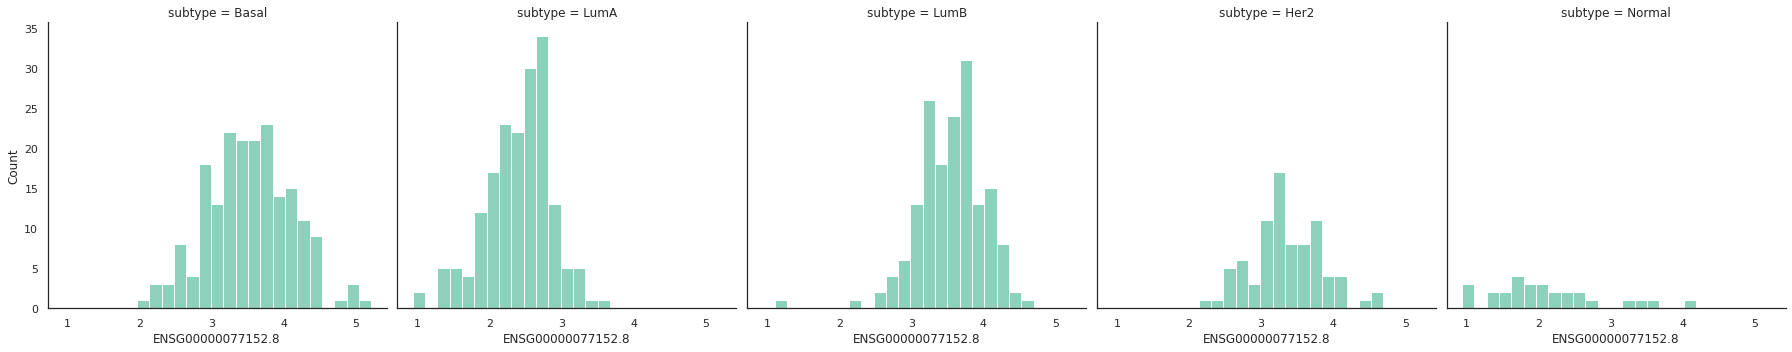

In [128]:
sns.displot(BC, x="ENSG00000077152.8", bins=25, col="subtype")
sns.despine()

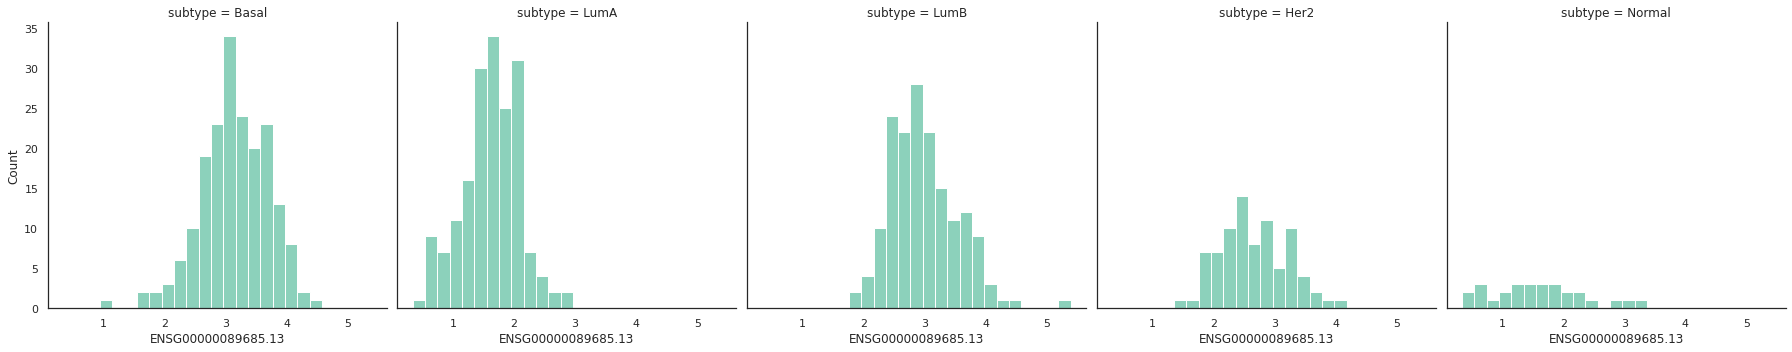

In [129]:
sns.displot(BC, x="ENSG00000089685.13", bins=25, col="subtype")
sns.despine()

In [144]:
#Yes, there expression variers from one subtype to another. We can see in the scatterplot that the basal subtype, luminal B and HER2 subtypes express more both genes than luminal A and normal patients.
#The histograms show that the distribution for each gene is very similar based on the subtype.

<hr>

#### BONUS

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are there identified genes known to be link to their respective subtype?

In [185]:
Normal = BC.loc[BC.subtype == "Normal",:]

In [190]:
Normal1 = Normal.iloc[:, 1:48]

In [148]:
Basal = BC.loc[BC.subtype == "Basal",:]

In [212]:
Basal1 = Basal.iloc[:, 1:48]

In [149]:
LumB = BC.loc[BC.subtype == "LumB",:]

In [218]:
LumB1 = LumB.iloc[:, 1:48]

In [150]:
LumA = BC.loc[BC.subtype == "LumA",:]

In [193]:
LumA1 = LumA.iloc[:, 1:48]

In [155]:
Her2 = BC.loc[BC.subtype == "Her2",:]

In [194]:
Her21 = Her2.iloc[:, 1:48]

In [178]:
def col_avg(df):
    return df.mean()

In [209]:
Max_normal = Normal1.apply(col_avg, axis=0)
print (Max_normal)
Max_normal.max()

ENSG00000011426.9     1.253452
ENSG00000054598.6     1.894799
ENSG00000062038.12    2.967070
ENSG00000077152.8     2.112561
ENSG00000082175.13    1.389176
ENSG00000089685.13    1.587819
ENSG00000091831.20    2.237249
ENSG00000092621.10    2.469590
ENSG00000094804.8     1.001166
ENSG00000099953.8     2.595711
ENSG00000101057.14    1.869604
ENSG00000104332.10    4.327180
ENSG00000105173.12    0.712532
ENSG00000106605.9     3.386960
ENSG00000107262.15    2.478012
ENSG00000115648.12    3.407462
ENSG00000117399.12    2.114690
ENSG00000117724.11    1.392118
ENSG00000128422.14    4.811046
ENSG00000129514.5     3.627081
ENSG00000133627.16    0.990545
ENSG00000134057.13    2.210285
ENSG00000135679.20    1.874907
ENSG00000136997.13    3.967043
ENSG00000138180.14    1.240571
ENSG00000141424.11    4.526681
ENSG00000141736.12    3.395942
ENSG00000141738.12    2.212304
ENSG00000142945.11    1.369639
ENSG00000146648.14    2.054183
ENSG00000148773.11    1.314812
ENSG00000151715.6     1.621110
ENSG0000

5.090933214818214

In [210]:
#ENSG00000186847.5 is the most expressed gene for the Normal subtype

In [213]:
Max_basal = Basal1.apply(col_avg, axis=0)
print (Max_basal)
Max_basal.max()

ENSG00000011426.9     2.766139
ENSG00000054598.6     3.272900
ENSG00000062038.12    3.365543
ENSG00000077152.8     3.515786
ENSG00000082175.13    0.132116
ENSG00000089685.13    3.152759
ENSG00000091831.20    0.477802
ENSG00000092621.10    3.573395
ENSG00000094804.8     1.983689
ENSG00000099953.8     2.995876
ENSG00000101057.14    3.666414
ENSG00000104332.10    4.316575
ENSG00000105173.12    2.243438
ENSG00000106605.9     2.904422
ENSG00000107262.15    2.281719
ENSG00000115648.12    0.958372
ENSG00000117399.12    3.871317
ENSG00000117724.11    2.921039
ENSG00000128422.14    4.391701
ENSG00000129514.5     0.912254
ENSG00000133627.16    1.648320
ENSG00000134057.13    3.391622
ENSG00000135679.20    1.811412
ENSG00000136997.13    3.966765
ENSG00000138180.14    2.721242
ENSG00000141424.11    3.565960
ENSG00000141736.12    2.959640
ENSG00000141738.12    2.132674
ENSG00000142945.11    2.858165
ENSG00000146648.14    2.088192
ENSG00000148773.11    2.685261
ENSG00000151715.6     0.427342
ENSG0000

4.391700826280713

In [214]:
#ENSG00000128422.14 is the most expressed gene for the basal subtype.

In [215]:
Max_lumA = LumA1.apply(col_avg, axis=0)
print (Max_lumA)
Max_lumA.max()

ENSG00000011426.9     1.390474
ENSG00000054598.6     0.747372
ENSG00000062038.12    1.091629
ENSG00000077152.8     2.399020
ENSG00000082175.13    2.369185
ENSG00000089685.13    1.624495
ENSG00000091831.20    4.112567
ENSG00000092621.10    1.508253
ENSG00000094804.8     1.183441
ENSG00000099953.8     3.671722
ENSG00000101057.14    1.677974
ENSG00000104332.10    1.172444
ENSG00000105173.12    0.607701
ENSG00000106605.9     3.514327
ENSG00000107262.15    2.831979
ENSG00000115648.12    4.123162
ENSG00000117399.12    1.958834
ENSG00000117724.11    1.747309
ENSG00000128422.14    1.279664
ENSG00000129514.5     4.702168
ENSG00000133627.16    0.934148
ENSG00000134057.13    2.480779
ENSG00000135679.20    2.219870
ENSG00000136997.13    3.007733
ENSG00000138180.14    1.390132
ENSG00000141424.11    5.880280
ENSG00000141736.12    3.580768
ENSG00000141738.12    2.107708
ENSG00000142945.11    1.362558
ENSG00000146648.14    0.694354
ENSG00000148773.11    1.559366
ENSG00000151715.6     1.616721
ENSG0000

5.880279960131514

In [216]:
#ENSG00000141424.11 is the most expressed gene for the luminal A subtype.

In [219]:
Max_lumB = LumB1.apply(col_avg, axis=0)
print (Max_lumB)
Max_lumB.max()

ENSG00000011426.9     2.334625
ENSG00000054598.6     0.691107
ENSG00000062038.12    1.477658
ENSG00000077152.8     3.550151
ENSG00000082175.13    1.513182
ENSG00000089685.13    2.982998
ENSG00000091831.20    3.856838
ENSG00000092621.10    2.049395
ENSG00000094804.8     2.156349
ENSG00000099953.8     3.836785
ENSG00000101057.14    3.403816
ENSG00000104332.10    0.997219
ENSG00000105173.12    1.207171
ENSG00000106605.9     3.856011
ENSG00000107262.15    2.470925
ENSG00000115648.12    3.759845
ENSG00000117399.12    3.119945
ENSG00000117724.11    2.697085
ENSG00000128422.14    1.485807
ENSG00000129514.5     4.566840
ENSG00000133627.16    0.941914
ENSG00000134057.13    3.460225
ENSG00000135679.20    2.298652
ENSG00000136997.13    3.249696
ENSG00000138180.14    2.418967
ENSG00000141424.11    5.736392
ENSG00000141736.12    3.635103
ENSG00000141738.12    2.260601
ENSG00000142945.11    2.393129
ENSG00000146648.14    0.663297
ENSG00000148773.11    2.511453
ENSG00000151715.6     1.265665
ENSG0000

5.736391591769364

In [220]:
#ENSG00000141424.11 is the most expressed gene for the luminal B subtype.

In [221]:
Max_Her2 = Her21.apply(col_avg, axis=0)
print (Max_Her2)
Max_Her2.max()

ENSG00000011426.9     2.418083
ENSG00000054598.6     0.786914
ENSG00000062038.12    2.332186
ENSG00000077152.8     3.345683
ENSG00000082175.13    0.281822
ENSG00000089685.13    2.659438
ENSG00000091831.20    0.983795
ENSG00000092621.10    2.707994
ENSG00000094804.8     2.300591
ENSG00000099953.8     3.983822
ENSG00000101057.14    3.336140
ENSG00000104332.10    1.417329
ENSG00000105173.12    1.473608
ENSG00000106605.9     3.646003
ENSG00000107262.15    2.192375
ENSG00000115648.12    3.375181
ENSG00000117399.12    3.135235
ENSG00000117724.11    2.378007
ENSG00000128422.14    2.202120
ENSG00000129514.5     4.241070
ENSG00000133627.16    0.905475
ENSG00000134057.13    3.262551
ENSG00000135679.20    1.846385
ENSG00000136997.13    2.561808
ENSG00000138180.14    2.338018
ENSG00000141424.11    3.951626
ENSG00000141736.12    5.501526
ENSG00000141738.12    3.934691
ENSG00000142945.11    2.312772
ENSG00000146648.14    1.442498
ENSG00000148773.11    2.428187
ENSG00000151715.6     2.395729
ENSG0000

5.501525999458287

In [222]:
#ENSG00000141736.12 is the most expressed gene for the Her2 subtype.

In [ ]:
#I know a loop would have been better here, but I didn't exactly know how, so I used the long way that also works. 

In [223]:
#Luminal A and B have the same gene that is most expressed. ENSG00000141424.11 is SLC39A6 and its expression is associated with luminal breast cancer with good prognosis.
#ENSG00000141736.12 is ERBB2 which is the Her2 receptor which is overexpressed in HER2+ breast cancers.
#ENSG00000128422.14 is KRT17 which is associated with basal-like breast cancers.
#ENSG00000186847.5 is keratin 14 which is a higly expressed protein in normal tissues (especially epidermis).

<hr style="border:1px solid black"> </hr>

## Share your work

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!